###  Investigating Fandango Movie Ratings

In October 2015, a data journalist named Walt Hickey analyzed movie ratings data and found strong evidence to suggest that Fandango's rating system was biased and dishonest (Fandango is an online movie ratings aggregator).

Hickey found that there's a significant discrepancy between the number of stars displayed to users and the actual rating, which he was able to find in the HTML of the page. He was able to find that:

The actual rating was almost always rounded up to the nearest half-star. For instance, a 4.1 movie would be rounded off to 4.5 stars, not to 4 stars, as you may expect.
In the case of 8% of the ratings analyzed, the rounding up was done to the nearest whole star. For instance, a 4.5 rating would be rounded off to 5 stars.
For one movie rating, the rounding off was completely bizarre: from a rating of 4 in the HTML of the page to a displayed rating of 5 stars.

In this project, we'll analyze more recent movie ratings data to determine whether there has been any change in Fandango's rating system after Hickey's analysis.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
fandango_2015 = pd.read_csv('fandango_score_comparison.csv')
fandango_2016_17 = pd.read_csv('movie_ratings_16_17.csv')

In [3]:
fandango_2015 = fandango_2015.loc[:, ['FILM', 'Fandango_Stars', 'Fandango_Ratingvalue', 'Fandango_votes', 'Fandango_Difference']]
fandango_2016_17 = fandango_2016_17.loc[:, ['movie', 'year', 'fandango']]

In [4]:
fandango_2015.head(10)

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5
1,Cinderella (2015),5.0,4.5,12640,0.5
2,Ant-Man (2015),5.0,4.5,12055,0.5
3,Do You Believe? (2015),5.0,4.5,1793,0.5
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5
5,The Water Diviner (2015),4.5,4.0,397,0.5
6,Irrational Man (2015),4.0,3.5,252,0.5
7,Top Five (2014),4.0,3.5,3223,0.5
8,Shaun the Sheep Movie (2015),4.5,4.0,896,0.5
9,Love & Mercy (2015),4.5,4.0,864,0.5


In [5]:
fandango_2016_17.head(5)

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5
2,A Cure for Wellness,2016,3.0
3,A Dog's Purpose,2017,4.5
4,A Hologram for the King,2016,3.0


Total population of our interest is all the movies ever rated on Fandango.

Sampling was not random as it contains every film that has a Rotten Tomatoes rating, a RT User rating, a Metacritic score, a Metacritic User score, and IMDb score, and at least 30 fan reviews on Fandango.

The new goal, instead of determining whether there has been any change in Fandango's rating system after Hickey's analysis, will be comparing the Fandango's rating system before and after Hickey's analysis.

With the new goal, we now have two populations that we want to describe and compare with each other:

- All Fandango's ratings for popular movies released in 2015.
- All Fandango's ratings for popular movies released in 2016.

In [6]:
fandango_2015['year'] = (fandango_2015['FILM']
                         .str
                         .extract(r'\(([\d]{4})\)', expand=False)
                         .astype(int)
                        )

In [7]:
fandango_2015['year'].value_counts()

2015    129
2014     17
Name: year, dtype: int64

In [8]:
fandango_2016_17['year'].value_counts()

2016    191
2017     23
Name: year, dtype: int64

Lets isolate the movies released in 2015 and 2016 into two respective datasets and use them for further analysis

In [9]:
fandango_2015 = fandango_2015[fandango_2015['year'] == 2015]

In [10]:
fandango_2016 = fandango_2016_17[fandango_2016_17['year'] == 2016]

In [11]:
fandango_2015.head(5)

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference,year
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5,2015
1,Cinderella (2015),5.0,4.5,12640,0.5,2015
2,Ant-Man (2015),5.0,4.5,12055,0.5,2015
3,Do You Believe? (2015),5.0,4.5,1793,0.5,2015
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5,2015


In [12]:
fandango_2016.head(5)

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5
2,A Cure for Wellness,2016,3.0
4,A Hologram for the King,2016,3.0
5,A Monster Calls,2016,4.0


In [13]:
plt.style.use('fivethirtyeight')

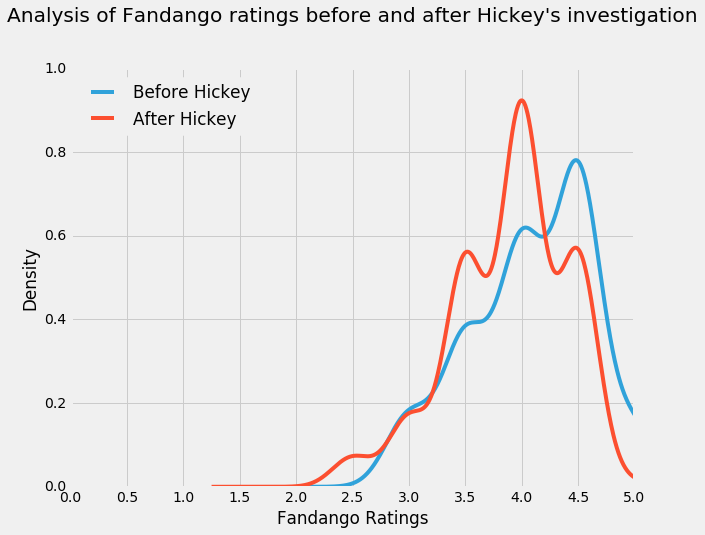

In [30]:
fandango_2015['Fandango_Stars'].plot.kde(label = 'Before Hickey', legend = True, figsize = (9, 7))
fandango_2016['fandango'].plot.kde(label = 'After Hickey', legend = True)

plt.title('Analysis of Fandango ratings before and after Hickey\'s investigation', y = 1.1)
plt.xticks(np.arange(0, 5.1, 0.5))
plt.xlabel('Fandango Ratings')
plt.xlim(0, 5)
plt.ylim(0, 1)
plt.show()

Yes, there has been a change after Hickey's investigation.
There has been a significant decrease in the 4.5 and 5.0 ratings.

In [34]:
fandango_2015['Fandango_Stars'].value_counts(normalize=True).sort_index()

3.0    0.085271
3.5    0.178295
4.0    0.286822
4.5    0.379845
5.0    0.069767
Name: Fandango_Stars, dtype: float64

In [35]:
fandango_2016['fandango'].value_counts(normalize=True).sort_index()

2.5    0.031414
3.0    0.073298
3.5    0.240838
4.0    0.403141
4.5    0.246073
5.0    0.005236
Name: fandango, dtype: float64

In [37]:
# Compute the mean, median and the mode


In [50]:
mean_2015 = fandango_2015['Fandango_Stars'].mean()
mean_2016 = fandango_2016['fandango'].mean()

median_2015 = fandango_2015['Fandango_Stars'].median()
median_2016 = fandango_2016['fandango'].median()

mode_2015 = fandango_2015['Fandango_Stars'].mode().loc[0]
mode_2016 = fandango_2016['fandango'].mode().loc[0]

In [51]:
fandango_2015['Fandango_Stars'].plot.kde(label = 'Before Hickey', legend = True, figsize = (9, 7))
fandango_2016['fandango'].plot.kde(label = 'After Hickey', legend = True)

plt.title('Analysis of Fandango ratings before and after Hickey\'s investigation', y = 1.1)
plt.xticks(np.arange(0, 5.1, 0.5))
plt.xlabel('Fandango Ratings')
plt.xlim(0, 5)
plt.ylim(0, 1)
plt.show()

4.0

In [56]:
stats_df = pd.DataFrame()

stats_df['mean'] = [mean_2015, mean_2016]
stats_df['median'] = [median_2015, median_2016]
stats_df['mode'] = [mode_2015, mode_2016]

stats_df.index = ['2015', '2016']

stats_df

,mean,median,mode
2015,4.085271,4.0,4.5
2016,3.887435,4.0,4.0


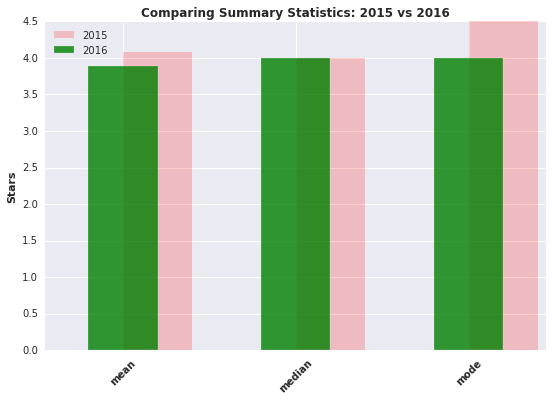

In [93]:
stats_df.loc['2015'].plot.bar(label = '2015', legend = True, width=0.4, align='edge', alpha = 0.2, color = 'red')
stats_df.loc['2016'].plot.bar(label = '2016', legend = True, width=0.4, alpha = 0.8, color = 'green')

plt.title('Comparing Summary Statistics: 2015 vs 2016', weight='bold')
plt.ylabel('Stars', weight='bold')
plt.xticks([0, 1, 2], ['mean', 'median', 'mode'], weight='bold', rotation=45)
plt.show()

In [ ]:
Looks like the Fandango ratings did go down after Hickey's in'